In [214]:
import sqlite3
import pandas as pd
import numpy as np
import pickle
import math



import matplotlib.pyplot as plt
import seaborn as sns

def save_pkl(variable, name):
    name = name + '.pkl'
    output = open(name, 'wb')
    pickle.dump(variable, output)
    output.close()

def load_pkl(name):
    name = name + '.pkl'
    pkl_file = open(name, 'rb')
    result = pickle.load(pkl_file)
    pkl_file.close()
    return result

# Firstly, prepare data. Start from news dataset

## From SQL to pandas pkl

In [2]:
def sql_fetch(con):
 
    cursorObj = con.cursor()
 
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
 
    return (cursorObj.fetchall()[0][0])

con = sqlite3.connect('all-the-news.db')
table_name = sql_fetch(con)
query = "SELECT * FROM {}".format(table_name)
df = pd.read_sql_query(query, con)

save_pkl(df, 'news')

## Loading data from pkl

In [3]:
df = load_pkl('news')

In [4]:
print('Data shape is {}'.format(df.shape))
print('-------------------------------------------------------------------------------')

print('Columns are {}'.format([i for i in df.columns]))
print('-------------------------------------------------------------------------------')
print('To understand it, see the first entry')
print(df.iloc[0])
print('-------------------------------------------------------------------------------')

print('For example, the set of values of the category variable is {}'.format([i for i in set(\
                                                                        df['category'].values)]))
print('-------------------------------------------------------------------------------')
print('Let\'s explore nones')
print(df.isna().sum())

Data shape is (204135, 12)
-------------------------------------------------------------------------------
Columns are ['id', 'title', 'author', 'date', 'content', 'year', 'month', 'publication', 'category', 'digital', 'section', 'url']
-------------------------------------------------------------------------------
To understand it, see the first entry
id                                                             1
title          Agent Cooper in Twin Peaks is the audience: on...
author                                        \nTasha Robinson\n
date                                                  2017-05-31
content              And never more so than in Showtime’s new...
year                                                        2017
month                                                          5
publication                                                Verge
category                                                Longform
digital                                                     

In [5]:
# We do not need this columns for sure
df.drop(['digital', 'url'], axis = 1, inplace=True)

# As columns with date and context are crucial for our analysis, we drop rows where they are Nones
df = df[-df.isna()['date']]
df = df[-df.isna()['content']]

df.isna().sum()

id                  0
title               0
author          17747
date                0
content             0
year                0
month               0
publication         0
category        26650
section        115827
dtype: int64

In [6]:
date = np.array([])

for i in df['date']:
    try:
        date = np.append(date, pd.to_datetime(i))
    except:
        date = np.append(date, pd.to_datetime(i[:10]))

In [7]:
df['date'] = date

In [16]:
df['year'] = pd.to_numeric(df['year'], downcast='integer')

In [18]:
df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [8]:
save_pkl(df, 'news')

## Loading the dataset, preprocessed for sentimental analysis

In [63]:
df = load_pkl('news')

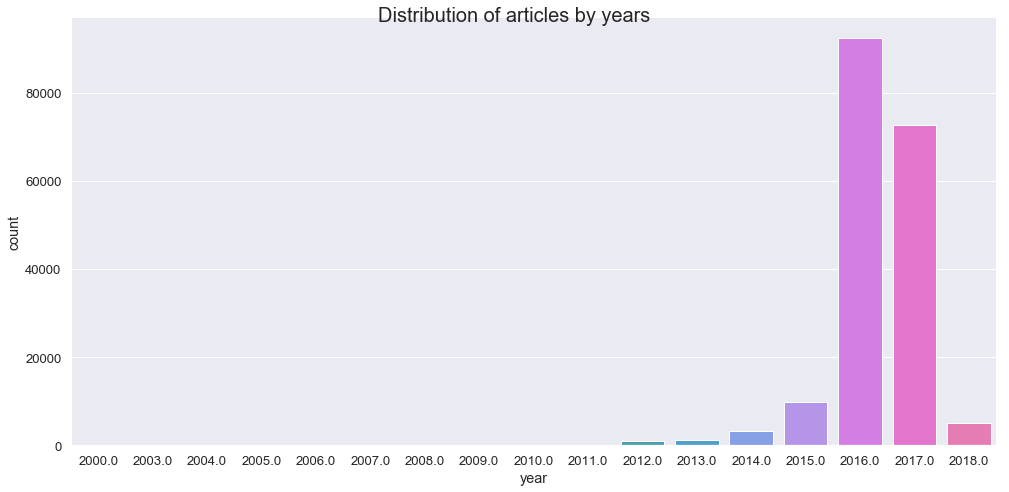

In [64]:
sns.set(font_scale=1.2)
g = sns.catplot(x="year", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by years', fontsize = 20)
g.savefig("years.png")

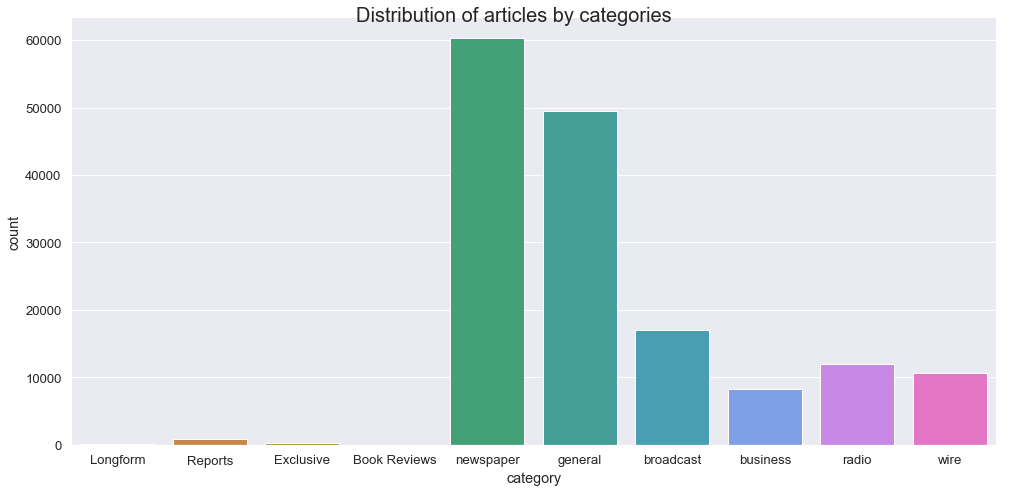

In [65]:
g = sns.catplot(x="category", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by categories', fontsize = 20)
g.savefig("categories.png")

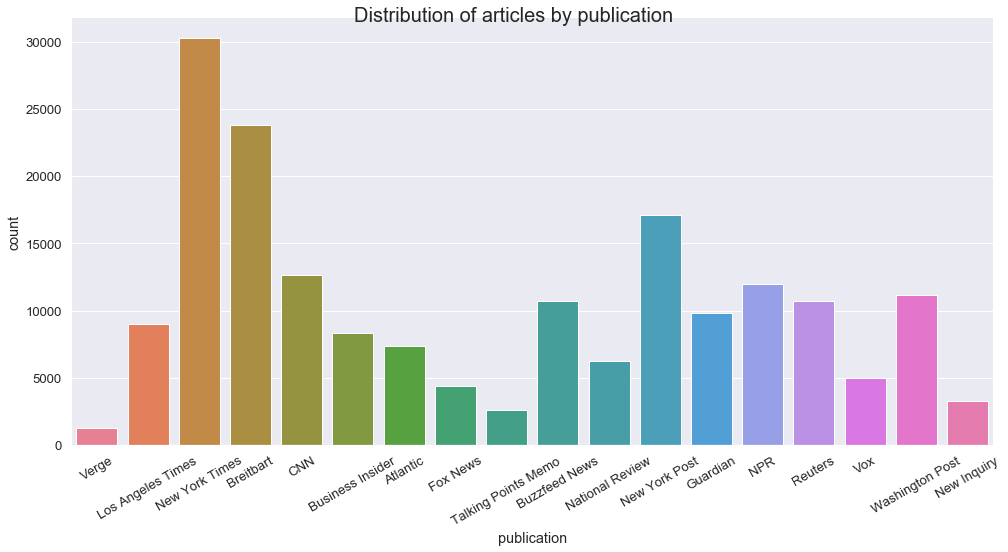

In [66]:
sns.set(font_scale=1.2)
g = sns.catplot(x="publication", kind="count", palette="husl",
            data=df, height=7, aspect=14/7)
g.fig.suptitle('Distribution of articles by publication', fontsize = 20)
plt.setp(g.ax.get_xticklabels(), rotation=30);
g.savefig("publications.png")

### An example of sentimental analysis, which will further be applied to the whole dataset

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [87]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return (score['compound'])

In [88]:
for i in range(20):
    sentiment_analyzer_scores(df['title'][i])

In [89]:
df['content'][4].split('.')

['      Ahead of Black Panther’s 2018 theatrical release, Marvel turned to Ta-Nehisi Coates to breathe new life into the nation of Wakanda',
 ' “I made most of my career analyzing the forces of racism and white supremacy as an idea in America',
 ' But what you begin to realize after you do that long enough — you aren’t talking about anything specific',
 ' In other words, you aren’t really talking about whether some people have lighter skin or some people have blonde hair or some people have blue eyes or some people have kinky hair',
 ' You’re talking about power',
 '” This is the voice of journalist, cultural critic, and best-selling author Ta-Nehisi Coates',
 ' Coates is the writer of Marvel’s latest entry in the Black Panther canon, Black Panther: A Nation Under Our Feet',
 ' With the book, he’s been charged with turning one of Marvel’s least understood and appreciated black characters into a marquee superhero',
 'Even if you don’t read comics, you likely know about the character Bla

In [156]:
def plot_histogram(text):
    
    def bins(x):
        if x <=-0.9:
            return -0.9
        elif x >-0.9 and x <= -0.8:
            return -0.8
        elif x >-0.8 and x <= -0.7:
            return -0.7
        elif x >-0.7 and x <= -0.6:
            return -0.6
        elif x >-0.6 and x <= -0.5:
            return -0.5
        elif x >-0.5 and x <= -0.4:
            return -0.4
        elif x >-0.4 and x <= -0.3:
            return -0.3
        elif x >-0.3 and x <= -0.2:
            return -0.2
        elif x >-0.2 and x <= -0.1:
            return -0.1
        elif x >-0.1 and x <= -0.0:
            return 0
        elif x >-0.0 and x <= 0.1:
            return 0.1
        elif x >0.1 and x <= 0.2:
            return 0.2
        elif x >0.2 and x <= 0.3:
            return 0.3
        elif x >0.3 and x <= 0.4:
            return 0.4
        elif x >0.4 and x <= 0.5:
            return 0.5
        elif x >0.5 and x <= 0.6:
            return 0.6
        elif x >0.6 and x <= 0.7:
            return 0.7
        elif x >0.7 and x <= 0.8:
            return 0.8
        elif x >0.8 and x <= 0.9:
            return 0.9
        elif x >0.9 and x <= 1:
            return 1
    
    sentences = text.split('.')
    compounds = []
    for i in sentences:
        compounds.append(sentiment_analyzer_scores(i))
    compounds = pd.DataFrame(compounds)
    compounds[0]=compounds[0].apply(bins)
    f, ax = plt.subplots(figsize = (10,5))
    sns.distplot(compounds[0], color="c")

/Users/polina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


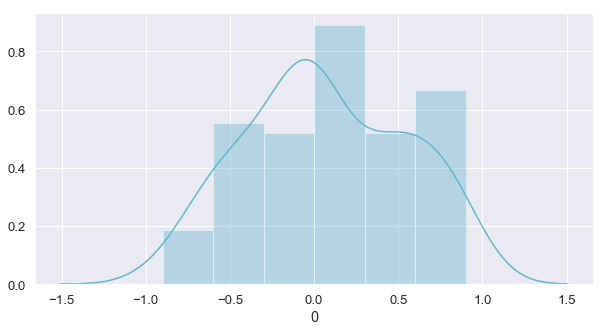

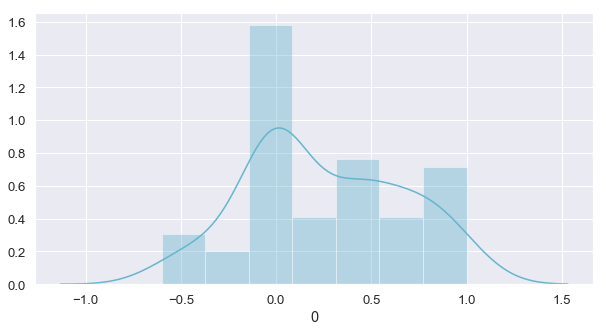

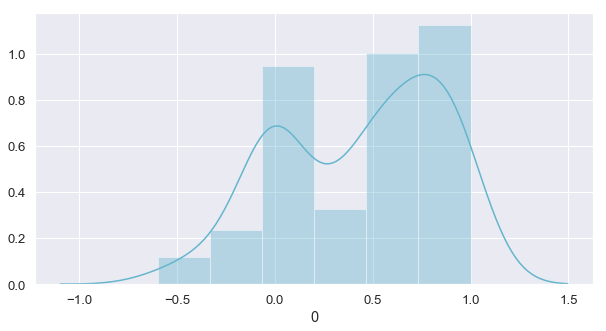

In [175]:
for i in range(3):
    plot_histogram(df['content'][i])

## Script for sentimential analysis, which was run on server

For the sentimental analysis we used `nltk` library, which had the sentimential analysis included. However, it worked correctly only with sentences, so we needed to summarize the normalized result for the content of whole article. For this sake we have taken the normalization function from `nltk`, and run the whole sentimential analysis on the whole dataset on server.

In [ ]:
import pandas as pd
from tqdm import tqdm
import math

import warnings
warnings.filterwarnings('ignore')

import pickle
def load_pkl(name):
    name = name + '.pkl'
    pkl_file = open(name, 'rb')
    result = pickle.load(pkl_file)
    pkl_file.close()
    return result

df = load_pkl('news')
df = df.drop_duplicates(subset='content', keep='first')

df_fr_2016 = df[df.date>='2016-1-1']

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from joblib import Parallel, delayed

#### old version take all content of the paper
# result = [] 
# sid = SentimentIntensityAnalyzer()
# result = Parallel(n_jobs=-1)(delayed(sid.polarity_scores)(article) for article in tqdm(df_fr_2016.content))

def normalize(score, alpha=15):
    """
    Normalize the score to be between -1 and 1 using an alpha that
    approximates the max expected value
    
    taken from nltk
    """
    norm_score = score/math.sqrt((score*score) + alpha)
    return norm_score

def append_sid_final(article):
    neg, neu, pos, com =  sid.polarity_scores(article).values()
    
    sentences = tokenize.sent_tokenize(article)
    wordFreqDic = []
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        wordFreqDic.append(ss)
    summ_com = 0 

    for i in range(len(wordFreqDic)):
        summ_com += wordFreqDic[i]['compound']
    summ_com = normalize(summ_com) 

    return {'neg': neg, 'neu': neu, 'pos': pos, 'compound': com,'compound_snts':summ_com}

result_all = []
sid = SentimentIntensityAnalyzer()
result_all = Parallel(n_jobs=-1)(delayed(append_sid_final)(article) for article in tqdm(df_fr_2016.content))

compound_all = []
compound_snts_all = []
pos_all = []
neg_all = []
neu_all = []
dates = []
ids = []
titles = []
for i in range(len(result_all)):
    neg, neu, pos, compound, compound_snts= result_all[i].values()
    ids.append(df_fr_2016.iloc[i].id)
    dates.append(df_fr_2016.iloc[i].date)
    titles.append(df_fr_2016.iloc[i].title)
    compound_all.append(compound)
    compound_snts_all.append(compound_snts)
    pos_all.append(pos)
    neg_all.append(neg)
    neu_all.append(neu)


dict_all = {'title':titles,'date':dates,'compound_sntns':compound_snts_all,
            'compound':compound_all,'neg': neg_all, 'neu': neu_all, 'pos': pos_all}


df_all = pd.DataFrame(dict_all,index=ids)

df_all.to_pickle("./df_2016_18.pkl")
    
    


## Loading the results of the sentimential analysis and merging them with our data

In [161]:
sentiment = load_pkl('df_2016_18')

In [174]:
df.head()

,id,title,author,date,content,year,month,publication,category,section
0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,None
1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,None
2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,None
3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,None
4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,None


In [173]:
merged = sentiment.merge(df)
merged['total_compound'] = 0

In [187]:
merged.head(1)

,compound,compound_sntns,date,neg,neu,pos,title,id,author,content,year,month,publication,category,section,total_compound
0,0.11,0.9714,2017-05-31,0.403251,0.765,0.124,Agent Cooper in Twin Peaks is the audience: on...,1,\nTasha Robinson\n,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,None,0


In [191]:
# this is needed to account for specific cases of extremely short texts, consisting of one/two sentences
total_compound = []
for i in range(merged.shape[0]):
#     print(i)
    if merged['compound_sntns'][i] == 1:
        total_compound.append(merged['compound'][i])
    else:
        total_compound.append(merged['compound'][i])

In [192]:
merged['total_compound'] = total_compound

## Sentiment distribution among all the papers

/Users/polina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


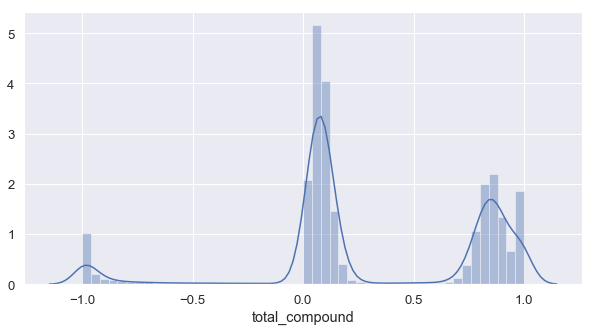

In [196]:
f, ax = plt.subplots(figsize = (10,5))
sns.distplot(merged['total_compound'])

In [200]:
merged.drop(['compound', 'compound_sntns'], axis = 1, inplace=True)
merged.head()

,date,neg,neu,pos,title,id,author,content,year,month,publication,category,section,total_compound
0,2017-05-31,0.403251,0.7650,0.1240,Agent Cooper in Twin Peaks is the audience: on...,1,\nTasha Robinson\n,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,None,0.110
1,2017-05-30,0.977190,0.8150,0.9997,"AI, the humanity!",2,\nSam Byford\n,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,None,0.148
2,2017-05-25,0.996097,0.7370,0.2250,The Viral Machine,3,\nKaitlyn Tiffany\n,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,None,0.038
3,2017-05-22,0.988808,0.9998,0.8360,How Anker is beating Apple and Samsung at thei...,4,\nNick Statt\n,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,None,0.035
4,2017-05-15,0.166950,0.5719,0.0720,Tour Black Panther’s reimagined homeland with ...,5,\nKwame Opam\n,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,None,0.048


In [201]:
save_pkl(merged, 'merged')

## Loading the dataset with all the news for futher preprocessing and pivoting

In [ ]:
merged = load_pkl('merged')

In [318]:
counts = merged.groupby('date').aggregate('count')['total_compound']

In [319]:
counts = pd.DataFrame(counts)
counts['counts'] = counts['total_compound']
counts.drop('total_compound', axis = 1, inplace = True)
counts.reset_index(inplace = True)

In [320]:
counts.head()

,date,counts
0,2016-01-01,155
1,2016-01-02,147
2,2016-01-03,147
3,2016-01-04,211
4,2016-01-05,237


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

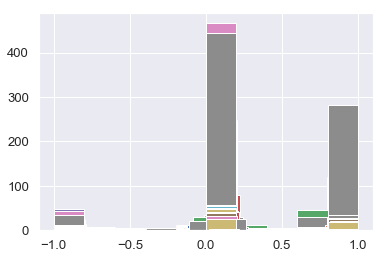

In [330]:
sentiment_table = np.zeros((counts.shape[0], 10))
count = 0
for i in merged.groupby('date'):
#     if count == 1:
#         break
#     f, ax = plt.subplots(figsize = (10,5))
#     if count < 5:
    a = plt.hist(i[1]['total_compound'], bins = 10)
    sentiment_table[count] = a[0]
    
    print(count)
    count +=1

In [333]:
sentiment = pd.DataFrame(sentiment_table, 
                        columns = [str(i) + '_bin' for i in range(1, 11)])

In [335]:
sentiment['date'] = counts['date']
sentiment['counts'] = counts['counts']
sentiment.head()

,1_bin,2_bin,3_bin,4_bin,5_bin,6_bin,7_bin,8_bin,9_bin,10_bin,date,counts
0,11.0,2.0,1.0,1.0,4.0,88.0,0.0,2.0,4.0,42.0,2016-01-01,155
1,7.0,1.0,3.0,1.0,3.0,62.0,0.0,1.0,13.0,56.0,2016-01-02,147
2,14.0,3.0,1.0,1.0,2.0,71.0,2.0,2.0,6.0,45.0,2016-01-03,147
3,17.0,3.0,2.0,0.0,3.0,99.0,1.0,2.0,14.0,70.0,2016-01-04,211
4,19.0,2.0,1.0,1.0,5.0,105.0,2.0,0.0,17.0,85.0,2016-01-05,237


In [336]:
save_pkl(sentiment, 'sentiment')

## After the news has been preprocessed, lets create datasets for financial time series